# Supervised Learning with scikit-learn

## Clasification

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

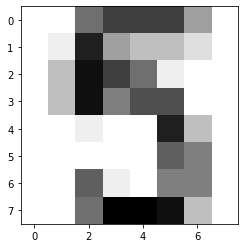

In [1]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


### Overfitting and Underfitting

In [ ]:
import numpy as np
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

## Regression

In [ ]:
import pandas as pd
boston = datasets.load_boston()
X = boston.data
y = boston.target
df = pd.DataFrame(X, columns=boston.feature_names)
df.head()

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X_room = X[:,5]
X_room.shape
X_room

In [ ]:
X_room = X_room.reshape(-1,1)
y= y.reshape(-1,1)
y.shape

In [ ]:
X_room

In [ ]:
plt.scatter(X_room,y)
plt.ylabel('Value of house in 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_room,y)
prediction_space = np.linspace(min(X_room),max(X_room)).reshape(-1,1)
plt.scatter(X_room,y,color='blue')
plt.plot(prediction_space,reg.predict(prediction_space),color='black',linewidth=3)
plt.show()

In [ ]:
import seaborn as sns
#Correlation between columns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/gapminder/gapminder.csv')
df.head()

In [ ]:
plt.scatter(df['fertility'],df['life'])
plt.ylabel('life exp')
plt.xlabel('fertility')
plt.show()

In [ ]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

X_fertility = np.asarray(df['fertility']).reshape(-1,1)
y = np.asarray(df['life']).reshape(-1,1)


# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)
# Print R^2 
print(reg.score(X_fertility,y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_fertility, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


### Cross Validation

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X_fertility,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


In [ ]:
%timeit cvscores_3 =cross_val_score(reg, X_fertility, y, cv = 3)

In [ ]:
%timeit cvscores_10=cross_val_score(reg, X_fertility, y, cv = 10)

In [ ]:
cvscores_3 =cross_val_score(reg, X_fertility, y, cv = 3)
print(np.mean(cvscores_3))
cvscores_10=cross_val_score(reg, X_fertility, y, cv = 10)
print(np.mean(cvscores_10))

### Regularization I: Lasso

In [ ]:
import pandas as pd
boston = datasets.load_boston()
X = boston.data
y = boston.target
y = y.reshape(-1,1)
X_room = X[:,5].reshape(-1,1)
print(X_room.shape,y.shape)
from sklearn import preprocessing 
X_pre = preprocessing.scale(X)
y_pre = preprocessing.scale(y)

In [ ]:
# Sirve para ver que feature predice mejor entre otras cosas, porque penaliza los coeficientes que no tienen una chota
# que ver y los manda a 0

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.1)

# Compute and print the coefficients
lasso_coef = lasso.fit(X_pre, y_pre).coef_

_ = plt.plot(range(len(df.columns)), lasso_coef)
_ = plt.xticks(range(len(df.columns)), df.columns, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()


### Regularization II: Ridge

In [ ]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [ ]:
#Lasso is great for feature selection, but when building regression models, Ridge regression should be your 
#first choice.

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=2)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


# Confusion Matrix on Scikit-Learn

In [ ]:
# Import dataset
import pandas as pd
import numpy as np
df = pd.read_csv('data/indians_diabetes/diabetes.csv')
df = df.dropna()
df.describe()
X_=df.drop('Outcome',axis=1)
X= df.drop('Outcome',axis=1).values
y=np.asarray(df['Outcome'])
print(y.shape,X.shape)

from sklearn import preprocessing 
X_pre = preprocessing.scale(X)
# https://stackoverflow.com/questions/56153726/plot-k-nearest-neighbor-graph-with-8-features/56301555

In [ ]:
# Sirve para ver que feature predice mejor entre otras cosas, porque penaliza los coeficientes que no tienen una chota
# que ver y los manda a 0

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.1)

# Compute and print the coefficients
from pylab import rcParams
lasso_coef = lasso.fit(X_pre, y).coef_
print(X_.columns,lasso_coef)
rcParams['figure.figsize'] = 10, 5
_ = plt.plot(range(len(X_.columns)), lasso_coef)
_ = plt.xticks(range(len(X_.columns)), X_.columns, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
#Correlation between columns
rcParams['figure.figsize'] = 10, 10
fig = plt.figure()
sns.heatmap(df.corr(), cmap='RdYlGn',annot=True, fmt=".2f")
plt.show()
fig.savefig('corr.png')

# Here we need to consider the feature-to-feature correlations and the outcome-to-feature correlations. 
# Between features: higher correlations mean we can drop one of them. However, high correlation between a feature
# and the outcome means that the feature is important and holds a lot of information. In our graph, the last line 
# represents the correlation between features and the outcome. Accordingly, the highest values/ most important
# features are 'Glucose' (0.47) and 'MBI' (0.29). Furthermore, the correlation between these two is relatively 
# low (0.22), which means they are not similar.

In [ ]:
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt


def plot_densities(data):
    '''
    Plot features densities depending on the outcome values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on outcome values 
    outcome_0 = data[data['Outcome'] == 0]
    outcome_1 = data[data['Outcome'] == 1]

    # init figure
    fig, axs = plt.subplots(8, 1)
    fig.suptitle('Features densities for different outcomes 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # plot densities for outcomes
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for Outcome = 0')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for Outcome = 1')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()
    fig.savefig('densities.png')
    
names = list(df.columns)

# plot correlation & densities
plot_densities(df)

# In the plots, when the green and red curves are almost the same (overlapping), it means the feature does not 
# separate the outcomes. In the case of the 'BMI' you can see some separation (the slight horizontal shift between
# both curves), and in 'Glucose' this is much clearer (This is in agreement with the correlation values).
# => The conclusion of this: If we have to choose just 2 features, then 'Glucose' and 'MBI' are the ones to choose.

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X_pre,y,test_size = 0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Building a logistic regression model

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


## Plotting an ROC curve

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
rcParams['figure.figsize'] = 10, 10
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# True Positive Rate = True Positives / (True Positives + False Negatives) -> Recall -> It is also called the 
# false alarm rate as it summarizes how often a positive class is predicted when the actual outcome is negative.


# False Positive Rate = False Positives / (False Positives + True Negatives)

## Area under the ROC curve

### AUC computation

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X_pre,y,test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X_pre,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


# Hyperparameter tuning

## Hyperparameter tuning with GridSearchCV 

In [ ]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_pre,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


## Hyperparameter tuning with RandomizedSearchCV

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data

tree_cv.fit(X_pre,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


## Hold-out set in practice

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pre,y,test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


# Preprocessing data

## Exploring categorical features

In [ ]:
#Importing gapminder dataset
import pandas as pd
import numpy as np

df = pd.read_csv('data/gapminder/gapminder.csv')
print(df.head())

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

## Creating dummy variables

In [ ]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df,drop_first=True)

# Print the new columns of df_region
print(df_region.columns)
df_region.head()

## Regression with categorical features

In [ ]:
# Gettin X & y

X = df_region[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality']]
y = df_region[['Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa']]

from sklearn import preprocessing 
X_pre = preprocessing.scale(X)

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5,normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X_pre,y,cv=5)

# Print the cross-validated scores
print(ridge_cv)


## Handling Missing Data

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/voting/voting-records_house-votes-84.csv')
df.head()

In [ ]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


## Imputing missing data in a ML Pipeline 

In [ ]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

## Centering and scaling your data

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/wine/winequality-white.csv')
df.head()

y = np.where(df['quality']<5, 0, 1)
df.describe()

X = np.asarray(df)
X

In [ ]:
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

## Centering and scaling in a pipeline

In [ ]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))


## Bringing it all together I: Pipeline for classification

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


## Bringing it all together II: Pipeline for regression

In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('data/gapminder/gapminder.csv')
# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df,drop_first=True)
#Correlation between columns
rcParams['figure.figsize'] = 10, 10
fig = plt.figure()
sns.heatmap(df.corr(), cmap='RdYlGn',annot=True, fmt=".2f")
plt.show()



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X= df[['fertility','BMI_female','BMI_male','child_mortality']]
y=df['life']

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


In [ ]:
# Import the necessary libraries first
from sklearn.feature_selection import f_classif

X=df.drop('Region',axis=1)
y=df['Region']
columns = X.columns


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X_scaled = sc.transform(X)

# Feature extraction
F,pval = f_classif(X_scaled, y)

# Summarize scores
#print(dict(zip(X.columns,F)))
print({k: v for k, v in sorted(dict(zip(columns,F)).items(), key=lambda item: item[1],reverse=True)})


In [ ]:
from sklearn.decomposition import PCA

X=df.drop('Region',axis=1)
y=df['Region']
columns = X.columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X_scaled = sc.transform(X)


pca = PCA()
pca.fit_transform(X_scaled)
X_test = pca.transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

print(explained_variance)

In [ ]:
rcParams['figure.figsize'] = 10, 5
_ = plt.plot(range(len(columns)), explained_variance,marker='o')
_ = plt.xticks(range(len(columns)), ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'], rotation=60)
_ = plt.ylabel('Variance')
plt.show()

In [ ]:
# Create train and test sets
X=df.drop('Region',axis=1)
y=df['Region']
columns = X.columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X_scaled = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#pca = PCA(n_components=2)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

In [ ]:
# Create train and test sets
X=df.drop('Region',axis=1)
y=df['Region']
columns = X.columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X_scaled = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

In [ ]:
X=df[['fertility', 'child_mortality', 'BMI_male', 'life', 'BMI_female']]
y=df['Region']

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X_scaled = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

In [ ]:
# Create train and test sets
X=df.drop('Region',axis=1)
y=df['Region']
columns = X.columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X_scaled = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


In [ ]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

In [ ]:
X=df[['fertility', 'child_mortality', 'BMI_male', 'life', 'BMI_female']]
y=df['Region']

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X_scaled = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


In [ ]:
# Create train and test sets
X=df.drop('Region',axis=1)
y=df['Region']
columns = X.columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X_scaled = sc.transform(X)
pca = PCA(n_components=5)
X = pca.fit_transform(X_scaled)
X = pca.transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))